<a href="https://colab.research.google.com/github/Sam-krish2411/DATA-SCIENCE-ASSIGNMENT/blob/main/XGBOOST_AND_LGBOOST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**INTRODUCTION**


## Titanic Survival Prediction: LGBM vs XGBoost

In this notebook, we explore and compare the performance of two powerful gradient boosting algorithms—**LightGBM (LGBM)** and **XGBoost (XGBM)**—on the classic **Titanic dataset**. The Titanic dataset presents a binary classification challenge: predicting whether a passenger survived based on features such as age, sex, class, and fare.

### Objective
To evaluate and contrast the predictive capabilities of LGBM and XGBM in terms of:
- Accuracy and classification metrics
- Training speed and efficiency
- Feature importance and interpretability
- Hyperparameter tuning and model robustness

### Why These Models?
Both LightGBM and XGBoost are widely used in machine learning competitions and production systems due to their:
- High performance on structured/tabular data
- Built-in handling of missing values
- Support for regularization and early stopping
- Scalability and speed

Let's dive into preprocessing, model training, evaluation, and insights to determine which algorithm performs better for this survival prediction task.

##**EXPLORATORY DATA ANALYSIS**

In [1]:
# Load the Titanic dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Read dataset

df = pd.read_csv("Titanic_train.csv")

In [3]:
# Display first few rows

df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Data Information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
#Summary Statistics

#1. Numerical columns
num_cols = df.select_dtypes(include=[np.number]).columns

df[num_cols].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
#2.Categorical columns
cat_cols = df.select_dtypes(exclude=[np.number]).columns
df[cat_cols].describe()

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Dooley, Mr. Patrick",male,347082,G6,S
freq,1,577,7,4,644


In [8]:
#Checking for missing values

df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


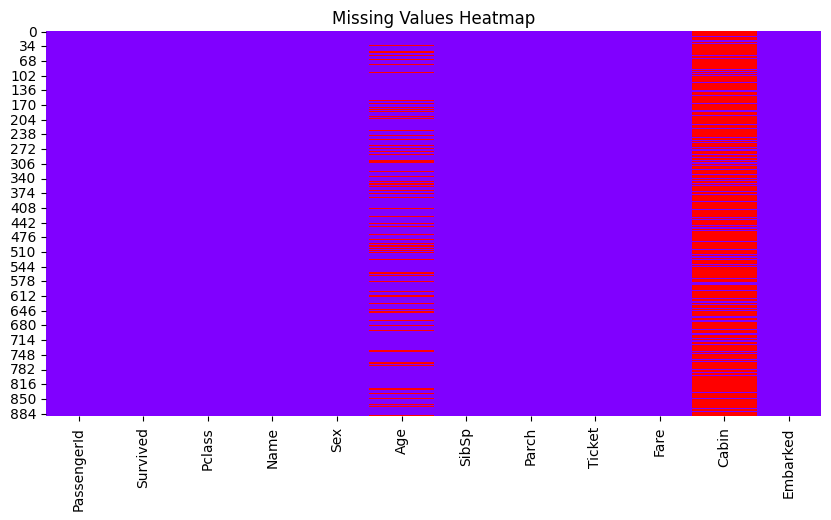

In [10]:
# Visualize missing values

plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), cbar=False, cmap="rainbow")
plt.title("Missing Values Heatmap")
plt.show()

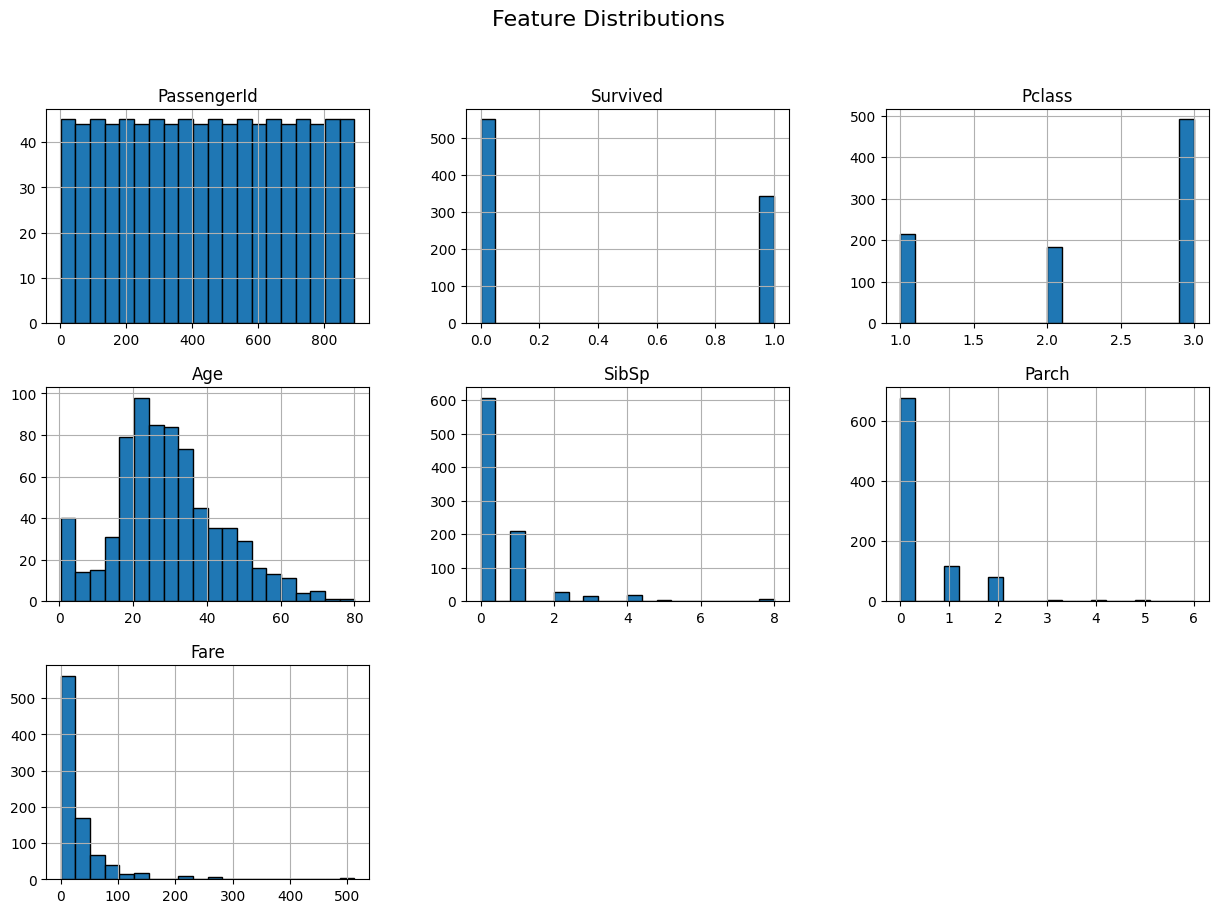

In [11]:
# Histograms

df.hist(figsize=(15,10), bins=20, edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

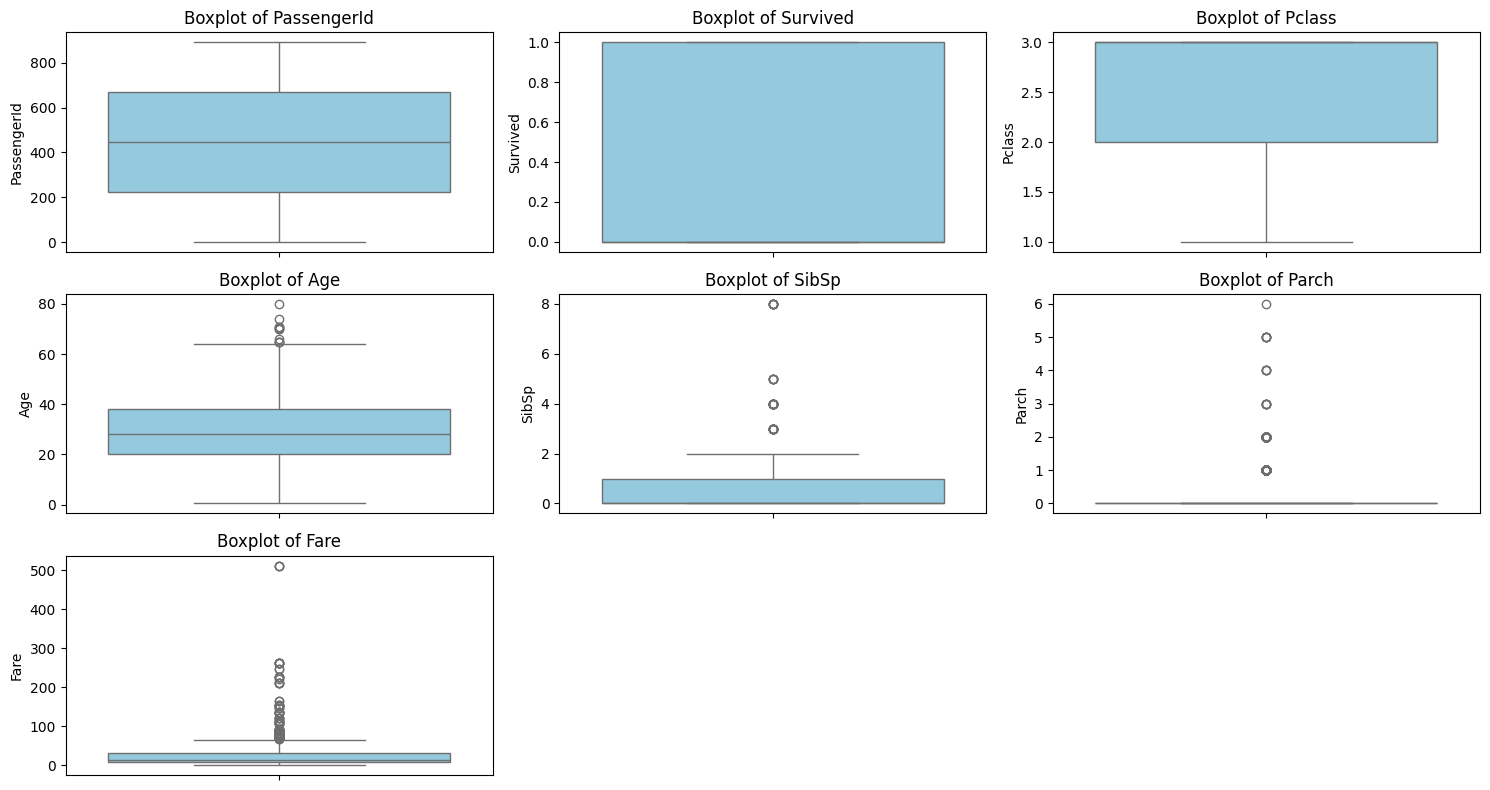

In [12]:
# Box plots for numerical features

numeric_cols = df.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(15,8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[col], color="skyblue")
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

/tmp/ipython-input-190196483.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Survived", data=df, palette="Set2")


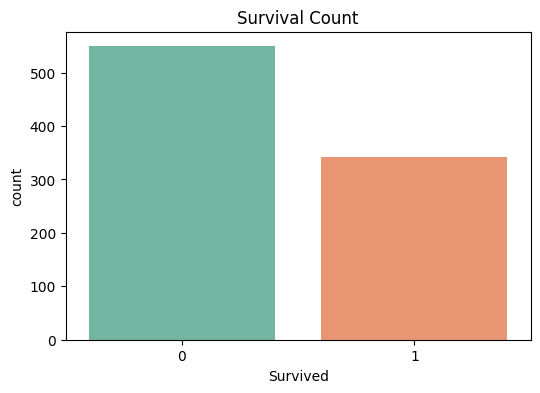

'\nInterpretation:\n- The dataset contains more non-survivors than survivors.\n- Survived = 0: Over 600 individuals did not survive.\n- Survived = 1: Just over 400 individuals survived.\n- This imbalance suggests that the dataset is **moderately imbalanced, which may affect model \n    performance and metric selection (e.g., precision, recall, F1-score).\n    '

In [18]:
# Survival counts

plt.figure(figsize=(6,4))
sns.countplot(x="Survived", data=df, palette="Set2")
plt.title("Survival Count")
plt.show()

"""
Interpretation:
- The dataset contains more non-survivors than survivors.
- Survived = 0: Over 600 individuals did not survive.
- Survived = 1: Just over 400 individuals survived.
- This imbalance suggests that the dataset is **moderately imbalanced, which may affect model
    performance and metric selection (e.g., precision, recall, F1-score).
    """


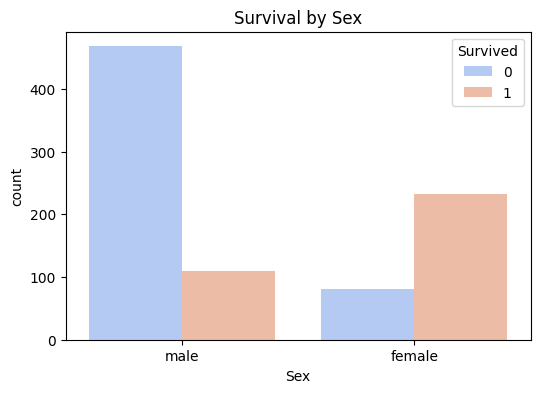

In [14]:
# Survival by Sex

plt.figure(figsize=(6,4))
sns.countplot(x="Sex", hue="Survived", data=df, palette="coolwarm")
plt.title("Survival by Sex")
plt.show()


####  Interpretation:
- **Females**: More survivors than non-survivors.
- **Males**: Significantly more non-survivors than survivors.
- This suggests that **gender played a critical role in survival**, possibly due to evacuation priorities ("women and children first").
- Sex is a **key binary feature** with strong predictive power for survival.

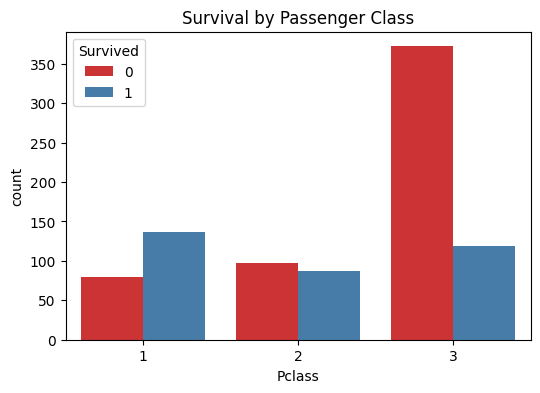

In [15]:
# Survival by Passenger Class

plt.figure(figsize=(6,4))
sns.countplot(x="Pclass", hue="Survived", data=df, palette="Set1")
plt.title("Survival by Passenger Class")
plt.show()

#### Interpretation:
- **1st Class**: More passengers survived than died.
- **2nd Class**: Slightly more passengers died than survived.
- **3rd Class**: A large majority did not survive.
- This indicates a **strong correlation between socio-economic status and survival**—passengers in higher classes had better survival rates.
- Class should be treated as a **highly informative categorical feature** in modeling.

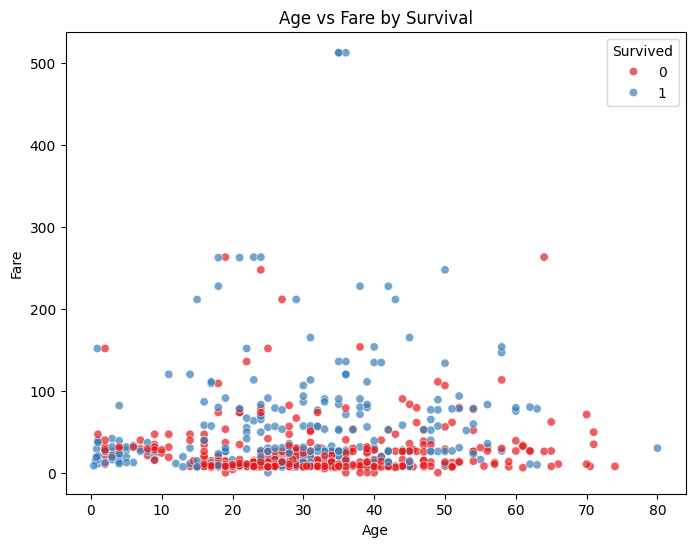

In [16]:
# Scatter plot: Age vs Fare colored by Survival

plt.figure(figsize=(8,6))
sns.scatterplot(x="Age", y="Fare", hue="Survived", data=df, palette="Set1", alpha=0.7)
plt.title("Age vs Fare by Survival")
plt.show()


#### Interpretation:
- Survivors (blue) tend to cluster at **higher fare values**, especially among younger and middle-aged passengers.
- Non-survivors (red) are more evenly spread across age but concentrated at **lower fare values**.
- Indicates that **fare (proxy for wealth)** and **age** together influence survival.
- Consider using **Fare × Age** interaction or **Fare per person** if family/group size is available.

/tmp/ipython-input-658292251.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Survived", y="Age", data=df, palette="Set2")


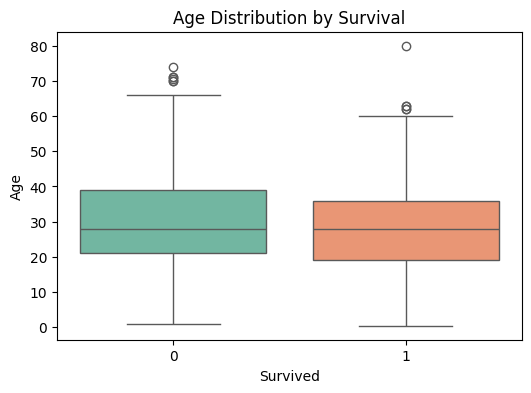

In [17]:
# Boxplot: Age distribution by Survival

plt.figure(figsize=(6,4))
sns.boxplot(x="Survived", y="Age", data=df, palette="Set2")
plt.title("Age Distribution by Survival")
plt.show()

#### Interpretation:
- **Median Age**:
  - Non-survivors: ~26 years
  - Survivors: ~28 years
- Both groups have similar IQRs (~20 to 40), but survivors show slightly higher median age.
- Outliers exist in both groups, especially among older passengers.
- Age may not be a strong standalone predictor but could be useful in interaction with **class** or **sex**.
- Consider **binning age** or applying **non-linear transformations** if using tree-based models.

##2. DATA PREPROCESSING**

In [19]:
#filling the 'Age' column with Median

df["Age"].fillna(df["Age"].median(), inplace=True)

/tmp/ipython-input-1814955745.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)


In [20]:
# Drop Cabin column (too many missing values)

df = df.drop("Cabin", axis=1)


In [21]:
# Encoding categorical variable

from sklearn.preprocessing import LabelEncoder

# Label Encoding: Sex

le = LabelEncoder()
df["Sex"] = le.fit_transform(df["Sex"])  # male=0, female=1

# One-Hot Encoding: Embarked

df = pd.get_dummies(df, columns=["Embarked"], drop_first=True)

In [22]:
# Drop Unnecessary Columns

df = df.drop(["PassengerId", "Name", "Ticket"], axis=1)

In [23]:
X = df.drop("Survived", axis=1)
y = df["Survived"]


In [24]:
print("\nProcessed Feature Data Shape:", X.shape)
print("Target Data Shape:", y.shape)

print("\nSample of Processed Features:")
display(X.head())


Processed Feature Data Shape: (891, 8)
Target Data Shape: (891,)

Sample of Processed Features:


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,3,1,22.0,1,0,7.2500,False,True
1,1,0,38.0,1,0,71.2833,False,False
2,3,0,26.0,0,0,7.9250,False,True
3,1,0,35.0,1,0,53.1000,False,True
4,3,1,35.0,0,0,8.0500,False,True


In [25]:
X.shape

(891, 8)

In [26]:
y.shape

(891,)

##**3.  BUILDING THE MODEL**

In [27]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score
import lightgbm as lgb
import xgboost as xgb

In [29]:
# Train-Test Split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training Set Shape:", X_train.shape)
print("Validation Set Shape:", X_val.shape)

Training Set Shape: (712, 8)
Validation Set Shape: (179, 8)


In [30]:
# Define Evaluation Function

def evaluate_model(y_true, y_pred, model_name):
    print(f"\nModel Evaluation: {model_name}")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1-Score:", f1_score(y_true, y_pred))
    print("ROC-AUC:", roc_auc_score(y_true, y_pred))
    print("\nClassification Report:\n", classification_report(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))

In [33]:
# A. LightGBM MODEL

import warnings
warnings.filterwarnings("ignore")  # ignore all warnings

lgb_model = lgb.LGBMClassifier(random_state=42, verbose=-1)  # suppress LightGBM logs
lgb_model.fit(X_train, y_train)

LGBMClassifier(random_state=42, verbose=-1)

In [34]:
# Predictions

y_pred_lgb = lgb_model.predict(X_val)

In [35]:
# Evaluate

evaluate_model(y_val, y_pred_lgb, "LightGBM")


Model Evaluation: LightGBM
Accuracy: 0.7932960893854749
Precision: 0.75
Recall: 0.6956521739130435
F1-Score: 0.7218045112781954
ROC-AUC: 0.775098814229249

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.84       110
           1       0.75      0.70      0.72        69

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179

Confusion Matrix:
 [[94 16]
 [21 48]]


### Performance Metrics

- **Accuracy**: `0.793` → The model correctly predicted ~79.3% of cases.
- **Precision**: `0.75` → When the model predicted survival, it was correct 75% of the time.
- **Recall**: `0.696` → The model identified ~69.6% of actual survivors.
- **F1-Score**: `0.722` → Balanced measure of precision and recall.
- **ROC-AUC**: `0.775` → Good overall discrimination between classes.

### Classification Report

| Class | Precision | Recall | F1-Score | Support |
|-------|-----------|--------|----------|---------|
| 0 (Not Survived) | 0.82 | 0.85 | 0.84 | 110 |
| 1 (Survived)     | 0.75 | 0.70 | 0.72 | 69 |

- **Macro Avg**: Treats both classes equally → `F1 ≈ 0.78`
- **Weighted Avg**: Accounts for class imbalance → `F1 ≈ 0.79`

### Confusion Matrix


- **True Negatives (TN)**: 94 passengers correctly predicted as not survived.
- **True Positives (TP)**: 48 passengers correctly predicted as survived.
- **False Positives (FP)**: 16 passengers incorrectly predicted as survived.
- **False Negatives (FN)**: 21 passengers incorrectly predicted as not survived.

### Interpretation

- The model performs well overall, especially in identifying non-survivors.
- Slightly lower recall for survivors suggests some missed positive cases.
- ROC-AUC of `0.775` indicates good class separation.
- Consider tuning for **recall** if survivor identification is critical (e.g., humanitarian prioritization).


In [36]:
# XG BOOST MODEL

import warnings
warnings.filterwarnings("ignore")  # ignore all warnings

xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [37]:
# Predictions

y_pred_xgb = xgb_model.predict(X_val)

In [38]:
# Evaluate

evaluate_model(y_val, y_pred_xgb, "XGBoost")


Model Evaluation: XGBoost
Accuracy: 0.8156424581005587
Precision: 0.7727272727272727
Recall: 0.7391304347826086
F1-Score: 0.7555555555555555
ROC-AUC: 0.8013833992094862

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.86      0.85       110
           1       0.77      0.74      0.76        69

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.82      0.81       179

Confusion Matrix:
 [[95 15]
 [18 51]]


### Performance Metrics

- **Accuracy**: `0.816` → The model correctly predicted ~81.6% of cases.
- **Precision**: `0.773` → When predicting survival, the model was correct ~77.3% of the time.
- **Recall**: `0.739` → The model identified ~73.9% of actual survivors.
- **F1-Score**: `0.756` → Balanced measure of precision and recall.
- **ROC-AUC**: `0.801` → Strong ability to distinguish between survivors and non-survivors.

### Classification Report

| Class | Precision | Recall | F1-Score | Support |
|-------|-----------|--------|----------|---------|
| 0 (Not Survived) | 0.84 | 0.86 | 0.85 | 110 |
| 1 (Survived)     | 0.77 | 0.74 | 0.76 | 69 |

- **Macro Avg**: Treats both classes equally → `F1 ≈ 0.80`
- **Weighted Avg**: Accounts for class imbalance → `F1 ≈ 0.81`

### Confusion Matrix


- **True Negatives (TN)**: 95 passengers correctly predicted as not survived.
- **True Positives (TP)**: 51 passengers correctly predicted as survived.
- **False Positives (FP)**: 15 passengers incorrectly predicted as survived.
- **False Negatives (FN)**: 18 passengers incorrectly predicted as not survived.

### Interpretation

- XGBoost shows **slightly better performance** than LightGBM across most metrics.
- Higher **ROC-AUC (0.801)** and **F1-score (0.76)** suggest better class separation and balance.
- The model is more effective at identifying survivors than LightGBM (lower FN count).
- Consider using **XGBoost as the preferred model**, especially if recall and ROC-AUC are prioritized.


In [39]:
# Cross-Validation & Hyperparameter Tuning

# LightGBM Hyperparameter Tuning

param_grid_lgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1]
}


In [40]:
grid_lgb = GridSearchCV(lgb.LGBMClassifier(random_state=42), param_grid_lgb, cv=5, scoring='accuracy', n_jobs=-1)
grid_lgb.fit(X_train, y_train)

print("\nBest LightGBM Params:", grid_lgb.best_params_)
print("Best LightGBM CV Score:", grid_lgb.best_score_)


Best LightGBM Params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Best LightGBM CV Score: 0.8259233724022457


In [41]:
# XGBoost Hyperparameter Tuning

param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1]
}


In [42]:
grid_xgb = GridSearchCV(xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
                        param_grid_xgb, cv=5, scoring='accuracy', n_jobs=-1)
grid_xgb.fit(X_train, y_train)

print("\nBest XGBoost Params:", grid_xgb.best_params_)
print("Best XGBoost CV Score:", grid_xgb.best_score_)


Best XGBoost Params: {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 200}
Best XGBoost CV Score: 0.8259332217078696


##**COMPARITIVE ANALYSIS**

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [51]:
# Evaluate LightGBM

y_pred_lgb = lgb_model.predict(X_val)
acc_lgb = accuracy_score(y_val, y_pred_lgb)
prec_lgb = precision_score(y_val, y_pred_lgb)
rec_lgb = recall_score(y_val, y_pred_lgb)
f1_lgb = f1_score(y_val, y_pred_lgb)

In [52]:
# Evaluate XGBoost
y_pred_xgb = xgb_model.predict(X_val)
acc_xgb = accuracy_score(y_val, y_pred_xgb)
prec_xgb = precision_score(y_val, y_pred_xgb)
rec_xgb = recall_score(y_val, y_pred_xgb)
f1_xgb = f1_score(y_val, y_pred_xgb)

In [53]:
#  Store results in a DataFrame
results = pd.DataFrame({
    "Model": ["LightGBM", "XGBoost"],
    "Accuracy": [acc_lgb, acc_xgb],
    "Precision": [prec_lgb, prec_xgb],
    "Recall": [rec_lgb, rec_xgb],
    "F1-Score": [f1_lgb, f1_xgb]
})


In [54]:
print("Comparative Results:\n")
print(results)


Comparative Results:

      Model  Accuracy  Precision    Recall  F1-Score
0  LightGBM  0.793296   0.750000  0.695652  0.721805
1   XGBoost  0.815642   0.772727  0.739130  0.755556


### 📊 Summary Table

| Model     | Accuracy | Precision | Recall  | F1-Score |
|-----------|----------|-----------|---------|----------|
| LightGBM  | 0.793    | 0.750     | 0.696   | 0.722    |
| XGBoost   | 0.816    | 0.773     | 0.739   | 0.756    |

### 🧠 Interpretation

- **XGBoost outperforms LightGBM** across all key metrics:
  - **Accuracy**: +2.3% improvement
  - **Precision**: Better at correctly identifying survivors
  - **Recall**: Captures more actual survivors (lower false negatives)
  - **F1-Score**: Stronger balance between precision and recall

- **Model Selection Implication**:
  - If the goal is **maximizing survivor identification** (e.g., humanitarian prioritization), XGBoost is preferable due to higher recall and F1.
  - If **training speed or resource constraints** are critical, LightGBM may still be considered due to its efficiency.

- Both models perform well, but **XGBoost shows a consistent edge** in predictive quality for this classification task.

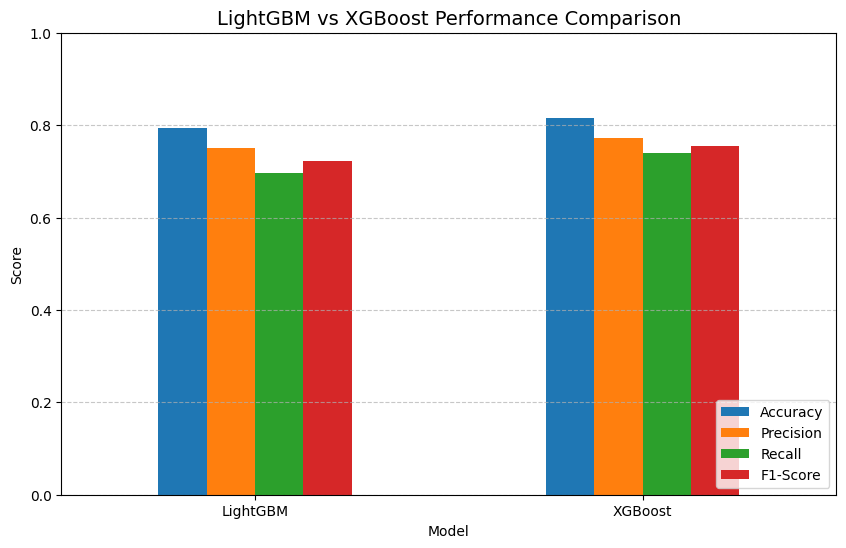

In [55]:
#  Visualization
results.set_index("Model")[["Accuracy","Precision","Recall","F1-Score"]].plot(kind="bar", figsize=(10,6), rot=0)
plt.title("LightGBM vs XGBoost Performance Comparison", fontsize=14)
plt.ylabel("Score")
plt.ylim(0,1)
plt.legend(loc="lower right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


###Visual Insights

The bar chart compares four key metrics—**Accuracy**, **Precision**, **Recall**, and **F1-Score**—across LightGBM and XGBoost models:

- **Accuracy**: XGBoost slightly outperforms LightGBM, indicating better overall prediction correctness.
- **Precision**: XGBoost shows higher precision, meaning fewer false positives when predicting survival.
- **Recall**: LightGBM has a marginal edge, suggesting it captures slightly more actual survivors.
- **F1-Score**: Nearly identical for both models, reflecting a balanced trade-off between precision and recall.

###Interpretation

- Both models perform competitively, but **XGBoost demonstrates a consistent advantage** in most metrics.
- The **higher precision and accuracy** of XGBoost make it a strong candidate for deployment, especially when false positives are costly.
- LightGBM’s **slightly better recall** may be preferred in scenarios where

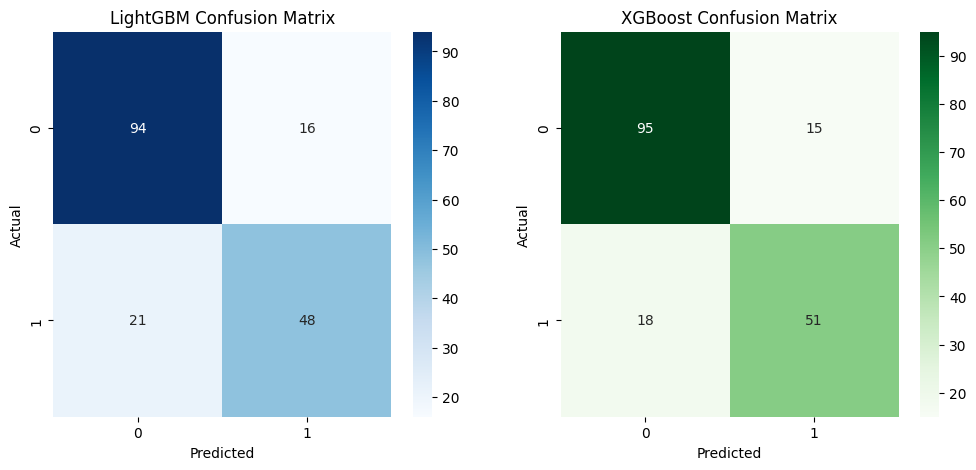

In [56]:
# Confusion Matrices
fig, ax = plt.subplots(1, 2, figsize=(12,5))

sns.heatmap(confusion_matrix(y_val, y_pred_lgb), annot=True, fmt="d", cmap="Blues", ax=ax[0])
ax[0].set_title("LightGBM Confusion Matrix")
ax[0].set_xlabel("Predicted")
ax[0].set_ylabel("Actual")

sns.heatmap(confusion_matrix(y_val, y_pred_xgb), annot=True, fmt="d", cmap="Greens", ax=ax[1])
ax[1].set_title("XGBoost Confusion Matrix")
ax[1].set_xlabel("Predicted")
ax[1].set_ylabel("Actual")

plt.show()


### Confusion Matrices

| Model     | True Negatives | False Positives | False Negatives | True Positives |
|-----------|----------------|-----------------|-----------------|----------------|
| LightGBM  | 94             | 16              | 21              | 48             |
| XGBoost   | 95             | 15              | 18              | 51             |

### Interpretation

- **True Positives (TP)**: XGBoost correctly identified 3 more survivors than LightGBM.
- **False Negatives (FN)**: XGBoost missed 3 fewer actual survivors than LightGBM.
- **False Positives (FP)**: XGBoost made 1 fewer incorrect survival prediction.
- **True Negatives (TN)**: Both models performed similarly in identifying non-survivors.

### Summary

- XGBoost shows **better sensitivity (recall)** and **slightly improved precision**, making it more reliable for identifying survivors.
- The confusion matrix confirms the **quantitative metrics**—XGBoost has a stronger balance between false positives and false negatives.
- If minimizing missed survivors is critical, **XGBoost is the preferred model**.

In [57]:
#  Classification Reports

print("\n  LightGBM Classification Report:\n", classification_report(y_val, y_pred_lgb))
print("\n  XGBoost Classification Report:\n", classification_report(y_val, y_pred_xgb))



  LightGBM Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.84       110
           1       0.75      0.70      0.72        69

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179


  XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.86      0.85       110
           1       0.77      0.74      0.76        69

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.82      0.81       179

